# GROUP PROJECT: NBA Player Salary Prediction

## Introduction

Basketball statistics are statistical measures of a player's performance throughout a game. And the stats are typically collected through cameras feeding data into proprietary software in the NBA. These statistics are analyzed to help teams to identify who exceeds in specific areas and plays a part on whether the player receives incentive compensations.

Because this data contained a lot of information about NBA players, we were curious to see if certain variables enable the player to have higher salaries than others. Therefore, the question we hope to answer with our project is: "Which basketball statistics enable players to have higher salaries?" Furthermore, we want test to see if we can determine a players salary based on these statistically significant variables.

The dataset we will be using is the 2021-2022 NBA Player Stats(retrieved from kaggle.com/datasets/vivovinco/nba-player-stats), which is an aggregate of NBA player stats from the 2021-2022 regular season. We also obtained the salaries of each player from a NBA Player Salaries dataset(retrieved from https://hoopshype.com/salaries/players/l/) which we will merge with the NBA Player Stats dataset.
The collected data contains stats of all NBA players from the season where each team plays 82 games. Our variables of interest has yet to be decided but will be determine by using analysis techniques(confounding variables, correlation matrix).

Response variable: 
- Salary : How much a player makes for the year 2021-2022 in $USD

30 possible variables:
- Rk : Rank
- Player : Player's name
- Pos : Position
- Age : Player's age
- Tm : Team
- G : Games played
- GS : Games started
- MP : Minutes played per game
- FG : Field goals per game
- FGA : Field goal attempts per game
- FG% : Field goal percentage
- 3P : 3-point field goals per game
- 3PA : 3-point field goal attempts per game
- 3P% : 3-point field goal percentage
- 2P : 2-point field goals per game
- 2PA : 2-point field goal attempts per game
- 2P% : 2-point field goal percentage
-  eFG% : Effective field goal percentage
- FT : Free throws per game
- FTA : Free throw attempts per game
- FT% : Free throw percentage
- ORB : Offensive rebounds per game
- DRB : Defensive rebounds per game
- TRB : Total rebounds per game
- AST : Assists per game
- STL : Steals per game
- BLK : Blocks per game
- TOV : Turnovers per game
- PF : Personal fouls per game
- PTS : Points per game

This dataset contains a total of 812 players.

## Preliminary Results

### Loading library

In [1]:
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(broom)
library(GGally)
library(rvest)
library(googlesheets4) 
library(AER)

library(repr)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

 

### Reading data: Player Data 
Since player data was found on Kaggle - data was downloaded and read in locally. 
This data set shows player stats for 217 NBA players in 2021-2022. This includes 30 different columns of information, not all of which will be used. 

In [2]:
data <- read.csv("data.csv",sep=";")
head(data)
tail(data)

Rk Player                   Pos Age Tm  G  GS MP   FG  FGA  ⋯ FT.   ORB DRB
1 1  Precious Achiuwa         C   22  TOR 73 28 23.6 3.6  8.3 ⋯ 0.595 2.0 4.5
2 2  Steven Adams             C   28  MEM 76 75 26.3 2.8  5.1 ⋯ 0.543 4.6 5.4
3 3  Bam Adebayo              C   24  MIA 56 56 32.6 7.3 13.0 ⋯ 0.753 2.4 7.6
4 4  Santi Aldama             PF  21  MEM 32  0 11.3 1.7  4.1 ⋯ 0.625 1.0 1.7
5 5  LaMarcus Aldridge        C   36  BRK 47 12 22.3 5.4  9.7 ⋯ 0.873 1.6 3.9
6 6  Nickeil Alexander-Walker SG  23  TOT 65 21 22.6 3.9 10.5 ⋯ 0.743 0.6 2.3
  TRB  AST STL BLK TOV PF  PTS 
1  6.5 1.1 0.5 0.6 1.2 2.1  9.1
2 10.0 3.4 0.9 0.8 1.5 2.0  6.9
3 10.1 3.4 1.4 0.8 2.6 3.1 19.1
4  2.7 0.7 0.2 0.3 0.5 1.1  4.1
5  5.5 0.9 0.3 1.0 0.9 1.7 12.9
6  2.9 2.4 0.7 0.4 1.4 1.6 10.6

Rk  Player         Pos Age Tm  G  GS MP   FG  FGA  ⋯ FT.   ORB DRB TRB AST
807 601 Thaddeus Young PF  33  SAS 26  1 14.2 2.8  4.9 ⋯ 0.455 1.5 2.0 3.6 2.3
808 601 Thaddeus Young PF  33  TOR 26  0 18.3 2.6  5.5 ⋯ 0.481 1.5 2.9 4.4 1.7
809 602 Trae Young     PG  23  ATL 76 76 34.9 9.4 20.3 ⋯ 0.904 0.7 3.1 3.7 9.7
810 603 Omer Yurtseven C   23  MIA 56 12 12.6 2.3  4.4 ⋯ 0.623 1.5 3.7 5.3 0.9
811 604 Cody Zeller    C   29  POR 27  0 13.1 1.9  3.3 ⋯ 0.776 1.9 2.8 4.6 0.8
812 605 Ivica Zubac    C   24  LAC 76 76 24.4 4.1  6.5 ⋯ 0.727 2.9 5.6 8.5 1.6
    STL BLK TOV PF  PTS 
807 0.9 0.3 1.2 1.5  6.1
808 1.2 0.4 0.8 1.7  6.3
809 0.9 0.1 4.0 1.7 28.4
810 0.3 0.4 0.7 1.5  5.3
811 0.3 0.2 0.7 2.1  5.2
812 0.5 1.0 1.5 2.7 10.3

In [3]:
id <- "1eMzdCDGCgxxDN3WMY-Jy78_NnUcMj582" #google file ID
data <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))
head(data)

Rk Player                   Pos Age Tm  G  GS MP   FG  FGA  ⋯ FT.   ORB DRB
1 1  Precious Achiuwa         C   22  TOR 73 28 23.6 3.6  8.3 ⋯ 0.595 2.0 4.5
2 2  Steven Adams             C   28  MEM 76 75 26.3 2.8  5.1 ⋯ 0.543 4.6 5.4
3 3  Bam Adebayo              C   24  MIA 56 56 32.6 7.3 13.0 ⋯ 0.753 2.4 7.6
4 4  Santi Aldama             PF  21  MEM 32  0 11.3 1.7  4.1 ⋯ 0.625 1.0 1.7
5 5  LaMarcus Aldridge        C   36  BRK 47 12 22.3 5.4  9.7 ⋯ 0.873 1.6 3.9
6 6  Nickeil Alexander-Walker SG  23  TOT 65 21 22.6 3.9 10.5 ⋯ 0.743 0.6 2.3
  TRB  AST STL BLK TOV PF  PTS 
1  6.5 1.1 0.5 0.6 1.2 2.1  9.1
2 10.0 3.4 0.9 0.8 1.5 2.0  6.9
3 10.1 3.4 1.4 0.8 2.6 3.1 19.1
4  2.7 0.7 0.2 0.3 0.5 1.1  4.1
5  5.5 0.9 0.3 1.0 0.9 1.7 12.9
6  2.9 2.4 0.7 0.4 1.4 1.6 10.6

In [4]:
str(data)

'data.frame':	812 obs. of  30 variables:
 $ Rk    : int  1 2 3 4 5 6 6 6 7 8 ...
 $ Player: chr  "Precious Achiuwa" "Steven Adams" "Bam Adebayo" "Santi Aldama" ...
 $ Pos   : chr  "C" "C" "C" "PF" ...
 $ Age   : int  22 28 24 21 36 23 23 23 26 23 ...
 $ Tm    : chr  "TOR" "MEM" "MIA" "MEM" ...
 $ G     : int  73 76 56 32 47 65 50 15 66 56 ...
 $ GS    : int  28 75 56 0 12 21 19 2 61 56 ...
 $ MP    : num  23.6 26.3 32.6 11.3 22.3 22.6 26.3 9.9 27.3 32.3 ...
 $ FG    : num  3.6 2.8 7.3 1.7 5.4 3.9 4.7 1.1 3.9 6.6 ...
 $ FGA   : num  8.3 5.1 13 4.1 9.7 10.5 12.6 3.2 8.6 9.7 ...
 $ FG.   : num  0.439 0.547 0.557 0.402 0.55 0.372 0.375 0.333 0.448 0.677 ...
 $ X3P   : num  0.8 0 0 0.2 0.3 1.6 1.9 0.7 2.4 0 ...
 $ X3PA  : num  2.1 0 0.1 1.5 1 5.2 6.1 2.2 5.9 0.2 ...
 $ X3P.  : num  0.359 0 0 0.125 0.304 0.311 0.311 0.303 0.409 0.1 ...
 $ X2P   : num  2.9 2.8 7.3 1.5 5.1 2.3 2.8 0.4 1.5 6.6 ...
 $ X2PA  : num  6.1 5 12.9 2.6 8.8 5.3 6.5 1 2.7 9.6 ...
 $ X2P.  : num  0.468 0.548 0.562 0.56 0.

### Reading Data: Salary Data - from Web
Demonstrating that a dataset can be read from web, we found the salary of the 217 NBA players from 2021-2022. This only includes two columns - X1 (Player Name) and X2 (Player Salary) 

In [5]:
salary_html <- read_html("https://hoopshype.com/salaries/players/2021-2022.html") %>%
                html_nodes("tbody .name , tbody .hh-salaries-sorted") %>%
                html_text()
salary <- str_replace_all(salary_html, "[\t\n$,]" , "")
salary_data = data.frame(matrix(salary,ncol=2,byrow=T),
                stringsAsFactors=FALSE)
head(salary_data)

X1                X2      
1 Stephen Curry     48070014
2 John Wall         47345760
3 Russell Westbrook 47063478
4 LeBron James      44474988
5 Kevin Durant      44119845
6 Bradley Beal      43279250

### Merging Datasets
In order to create the final dataset to use, we combine the two datasets to add Salary into the the player data collected from Kaggle - with the X1 column being the same as the player column in order to ensure that the salary column is associated with the right players. 

In [6]:
data_all <- merge(data, salary_data, by.x = "Player", by.y = "X1")
head(data_all)

Player        Rk  Pos Age Tm  G  GS MP   FG  FGA  ⋯ ORB DRB TRB AST STL BLK
1 Aaron Gordon  198 PF  26  DEN 75 75 31.7 5.8 11.1 ⋯ 1.7 4.2 5.9 2.5 0.6 0.6
2 Aaron Holiday 244 PG  25  TOT 63 15 16.2 2.4  5.4 ⋯ 0.4 1.6 1.9 2.4 0.7 0.1
3 Aaron Holiday 244 PG  25  WAS 41 14 16.2 2.4  5.2 ⋯ 0.2 1.4 1.6 1.9 0.6 0.2
4 Aaron Holiday 244 PG  25  PHO 22  1 16.3 2.3  5.6 ⋯ 0.7 1.8 2.5 3.4 0.8 0.0
5 Aaron Nesmith 406 SF  22  BOS 52  3 11.0 1.4  3.5 ⋯ 0.3 1.4 1.7 0.4 0.4 0.1
6 Aaron Wiggins 581 SG  23  OKC 50 35 24.2 3.1  6.7 ⋯ 1.0 2.5 3.6 1.4 0.6 0.2
  TOV PF  PTS  X2      
1 1.8 2.0 15.0 19690909
2 1.1 1.5  6.3 1968175 
3 1.0 1.5  6.1 1968175 
4 1.3 1.5  6.8 1968175 
5 0.6 1.3  3.8 3804360 
6 1.1 1.9  8.3 1563518

### Wrangling data
We remove any duplicate or useless columns, change column name and type for simplicity, and remove rows having NULL. 

In [7]:
colnames(data_all)[which(names(data_all) == "X2")] <- "SALARY"
head(data_all)

Player        Rk  Pos Age Tm  G  GS MP   FG  FGA  ⋯ ORB DRB TRB AST STL BLK
1 Aaron Gordon  198 PF  26  DEN 75 75 31.7 5.8 11.1 ⋯ 1.7 4.2 5.9 2.5 0.6 0.6
2 Aaron Holiday 244 PG  25  TOT 63 15 16.2 2.4  5.4 ⋯ 0.4 1.6 1.9 2.4 0.7 0.1
3 Aaron Holiday 244 PG  25  WAS 41 14 16.2 2.4  5.2 ⋯ 0.2 1.4 1.6 1.9 0.6 0.2
4 Aaron Holiday 244 PG  25  PHO 22  1 16.3 2.3  5.6 ⋯ 0.7 1.8 2.5 3.4 0.8 0.0
5 Aaron Nesmith 406 SF  22  BOS 52  3 11.0 1.4  3.5 ⋯ 0.3 1.4 1.7 0.4 0.4 0.1
6 Aaron Wiggins 581 SG  23  OKC 50 35 24.2 3.1  6.7 ⋯ 1.0 2.5 3.6 1.4 0.6 0.2
  TOV PF  PTS  SALARY  
1 1.8 2.0 15.0 19690909
2 1.1 1.5  6.3 1968175 
3 1.0 1.5  6.1 1968175 
4 1.3 1.5  6.8 1968175 
5 0.6 1.3  3.8 3804360 
6 1.1 1.9  8.3 1563518

In [8]:
clean_data <- data_all %>%
    select(-Rk, -GS) %>%
    transform(SALARY = as.numeric(SALARY)) %>%
    filter_all(any_vars(! is.na(.)))
head(clean_data)

Player        Pos Age Tm  G  MP   FG  FGA  FG.   X3P ⋯ ORB DRB TRB AST STL
1 Aaron Gordon  PF  26  DEN 75 31.7 5.8 11.1 0.520 1.2 ⋯ 1.7 4.2 5.9 2.5 0.6
2 Aaron Holiday PG  25  TOT 63 16.2 2.4  5.4 0.447 0.6 ⋯ 0.4 1.6 1.9 2.4 0.7
3 Aaron Holiday PG  25  WAS 41 16.2 2.4  5.2 0.467 0.6 ⋯ 0.2 1.4 1.6 1.9 0.6
4 Aaron Holiday PG  25  PHO 22 16.3 2.3  5.6 0.411 0.7 ⋯ 0.7 1.8 2.5 3.4 0.8
5 Aaron Nesmith SF  22  BOS 52 11.0 1.4  3.5 0.396 0.6 ⋯ 0.3 1.4 1.7 0.4 0.4
6 Aaron Wiggins SG  23  OKC 50 24.2 3.1  6.7 0.463 0.8 ⋯ 1.0 2.5 3.6 1.4 0.6
  BLK TOV PF  PTS  SALARY  
1 0.6 1.8 2.0 15.0 19690909
2 0.1 1.1 1.5  6.3  1968175
3 0.2 1.0 1.5  6.1  1968175
4 0.0 1.3 1.5  6.8  1968175
5 0.1 0.6 1.3  3.8  3804360
6 0.2 1.1 1.9  8.3  1563518

In [9]:
sapply(clean_data, function(x) sum(is.na(x))) #confirming there are no nulls

Player    Pos    Age     Tm      G     MP     FG    FGA    FG.    X3P   X3PA 
     0      0      0      0      0      0      0      0      0      0      0 
  X3P.    X2P   X2PA   X2P.   eFG.     FT    FTA    FT.    ORB    DRB    TRB 
     0      0      0      0      0      0      0      0      0      0      0 
   AST    STL    BLK    TOV     PF    PTS SALARY 
     0      0      0      0      0      0      0

No nulls in any column.

## Plotting Data
Visually explore the association between variables in the dataset using pair plots

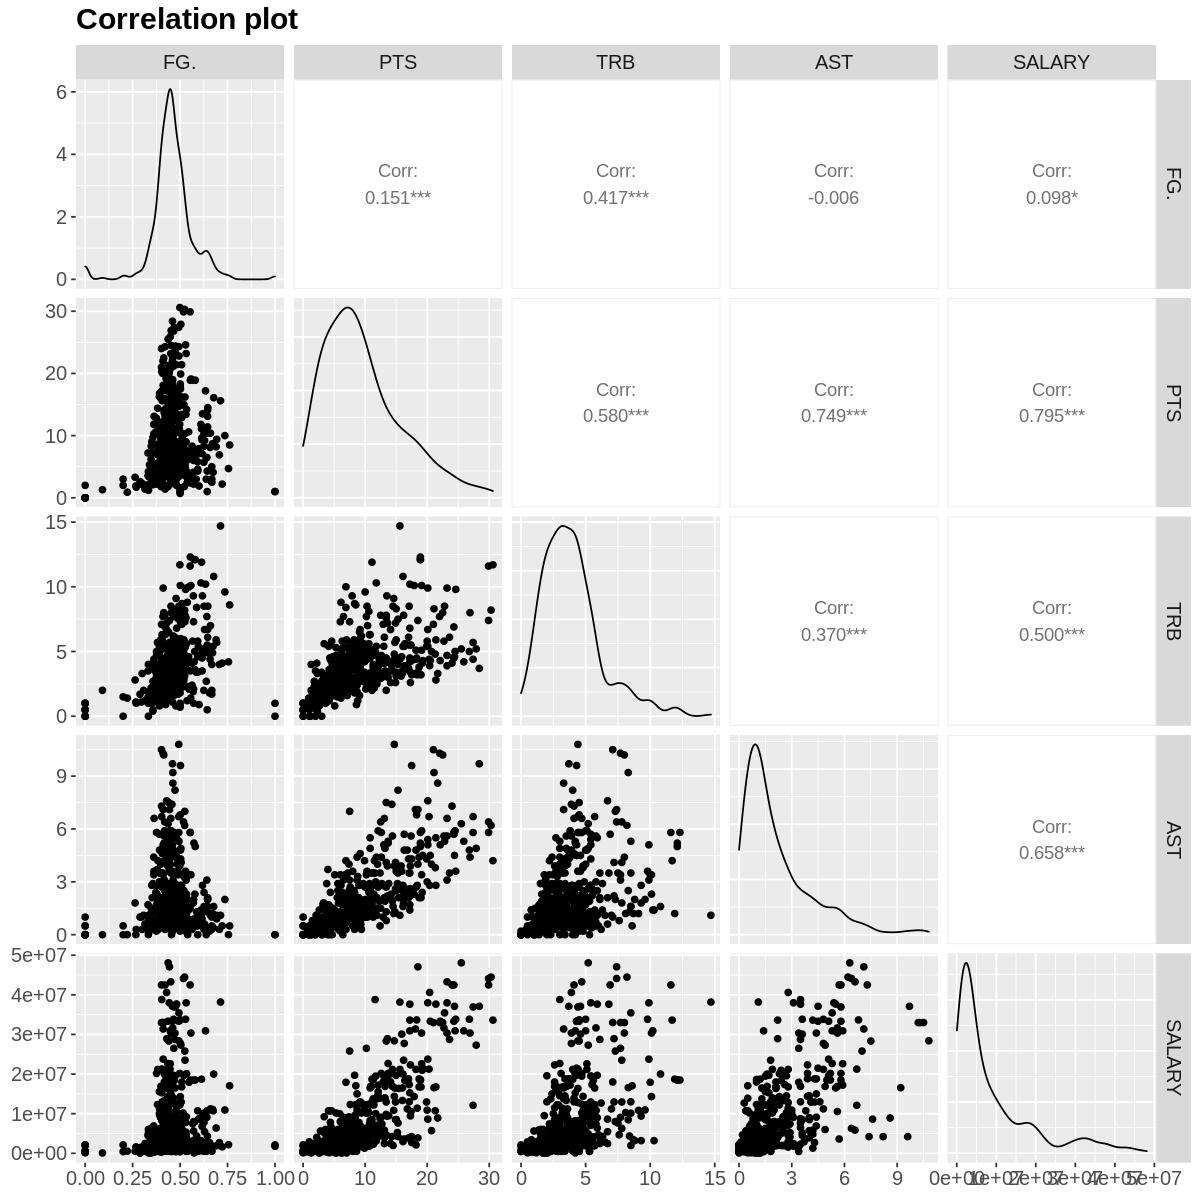

In [10]:
data_pair_plots <- 
  clean_data %>% 
  select(FG., PTS, TRB, AST, SALARY) %>%
  ggpairs() +
    theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Correlation plot")
options(repr.plot.width = 10, repr.plot.height = 10)
data_pair_plots

In [11]:
corr_matrix <- clean_data %>% 
  select(FG., PTS, TRB, AST) %>% #salary not included as it is our response variable
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr") %>%
  filter(corr != 1) %>%
  arrange(desc(corr))
head(corr_matrix)

var1 var2 corr     
1 PTS  AST  0.7493005
2 AST  PTS  0.7493005
3 PTS  TRB  0.5797840
4 TRB  PTS  0.5797840
5 FG.  TRB  0.4168449
6 TRB  FG.  0.4168449

From this we can see that Points per Game and Assists can be considered highly correlated - introducing a 
multicollinearity problem, we will attempt to resolve this further in our analysis

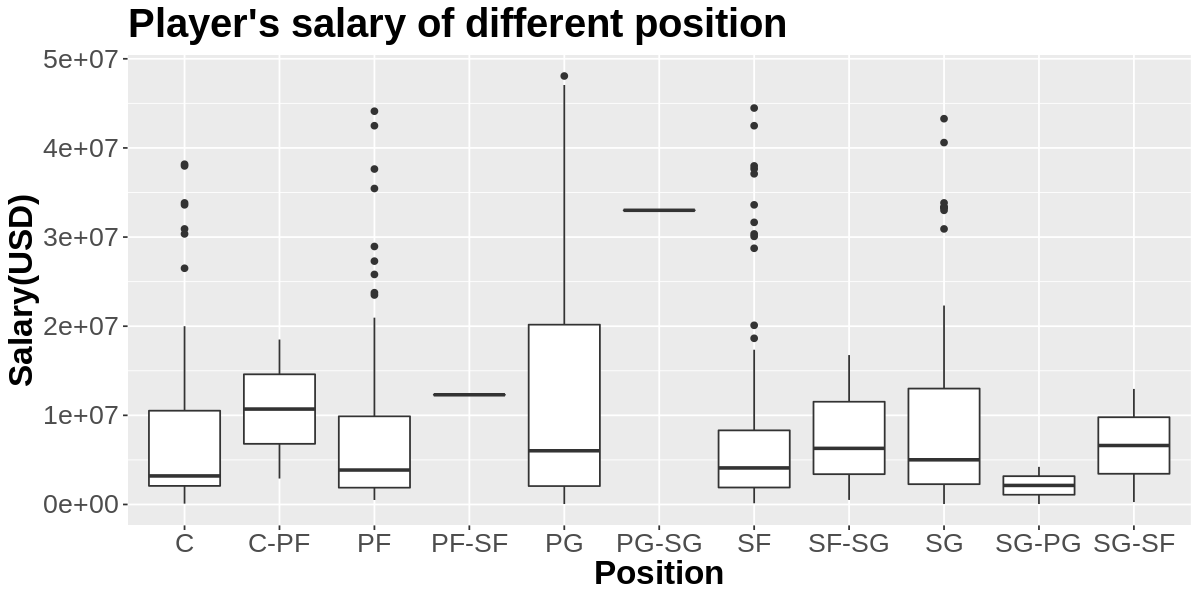

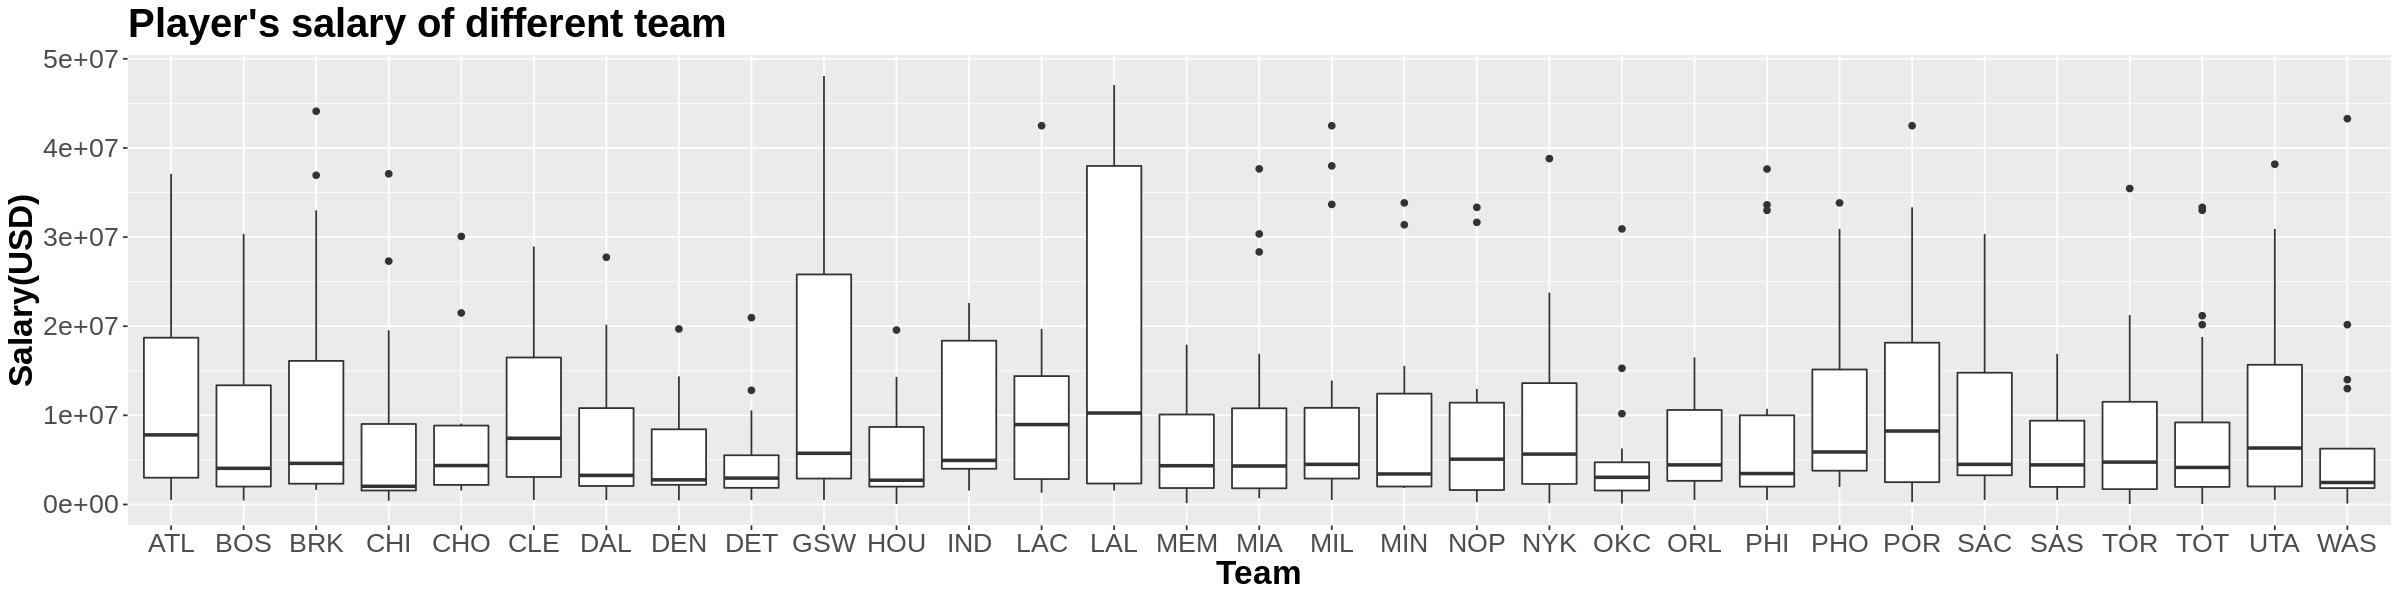

In [12]:
options(repr.plot.width = 10, repr.plot.height = 5)
pos_boxplot <- clean_data %>%
  ggplot(aes(x = Pos, y = SALARY)) +
  geom_boxplot() +
    ggtitle("Player's salary of different position")+
  labs(x = "Position") +
  labs(y = "Salary(USD)")+
    theme(text = element_text(size = 20),
          plot.title = element_text(face = "bold"),
          axis.title = element_text(face = "bold"))
pos_boxplot
options(repr.plot.width = 20, repr.plot.height = 5)
team_boxplot <- clean_data %>%
  ggplot(aes(x = Tm, y = SALARY)) +
  geom_boxplot() +
    ggtitle("Player's salary of different team")+
  labs(x = "Team") +
  labs(y = "Salary(USD)")+
    theme(text = element_text(size = 20),
          plot.title = element_text(face = "bold"),
          axis.title = element_text(face = "bold"))
team_boxplot

The two boxplots roughly show the difference in players' salaries between two discrete columns. We can see the salary varies between different positions and teams.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



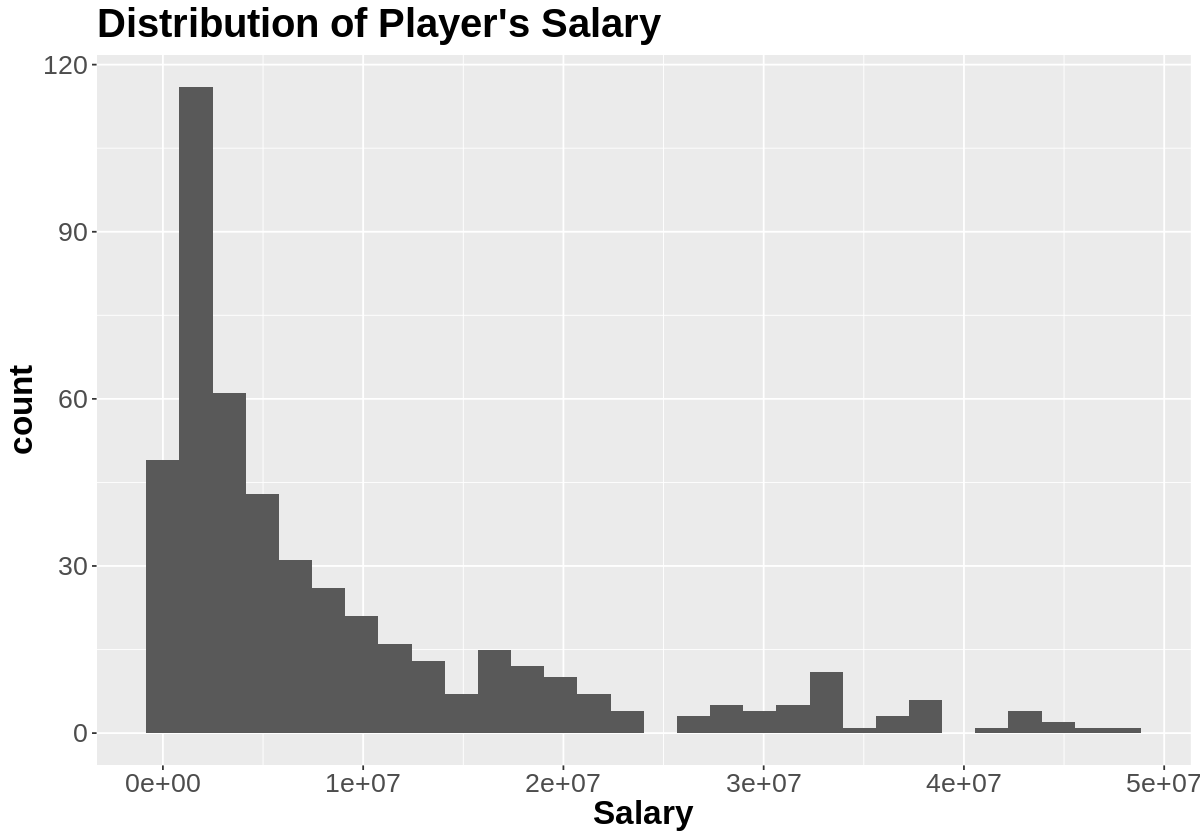

In [13]:
options(repr.plot.width = 10, repr.plot.height = 7)
salary_distribution <- clean_data %>%
    ggplot(aes(x = SALARY)) +
    geom_histogram() +
    ggtitle("Distribution of Player's Salary")+
    labs(x = "Salary") +
    theme(
        text = element_text(size = 20),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold"))
salary_distribution

The distrubution of salary is extremely right-skewed, so we cannot assume that the distribution of our target is normal distribution.

## Predictive Modeling using Linear Regression

In [14]:
clean_data <- data_all %>%
    select(-Player) %>%
    transform(SALARY = as.numeric(SALARY)) %>%
    filter_all(any_vars(! is.na(.)))
head(clean_data)

Rk  Pos Age Tm  G  GS MP   FG  FGA  FG.   ⋯ ORB DRB TRB AST STL BLK TOV PF 
1 198 PF  26  DEN 75 75 31.7 5.8 11.1 0.520 ⋯ 1.7 4.2 5.9 2.5 0.6 0.6 1.8 2.0
2 244 PG  25  TOT 63 15 16.2 2.4  5.4 0.447 ⋯ 0.4 1.6 1.9 2.4 0.7 0.1 1.1 1.5
3 244 PG  25  WAS 41 14 16.2 2.4  5.2 0.467 ⋯ 0.2 1.4 1.6 1.9 0.6 0.2 1.0 1.5
4 244 PG  25  PHO 22  1 16.3 2.3  5.6 0.411 ⋯ 0.7 1.8 2.5 3.4 0.8 0.0 1.3 1.5
5 406 SF  22  BOS 52  3 11.0 1.4  3.5 0.396 ⋯ 0.3 1.4 1.7 0.4 0.4 0.1 0.6 1.3
6 581 SG  23  OKC 50 35 24.2 3.1  6.7 0.463 ⋯ 1.0 2.5 3.6 1.4 0.6 0.2 1.1 1.9
  PTS  SALARY  
1 15.0 19690909
2  6.3  1968175
3  6.1  1968175
4  6.8  1968175
5  3.8  3804360
6  8.3  1563518

In [15]:
# splitting of data set into training and testing data on a 70-30 split 
set.seed(12345)


clean_data$ID<- rownames(clean_data)

training_salary <- sample_n(clean_data, size = nrow(clean_data)*0.7, replcae = FALSE)

testing_salary <- anti_join(clean_data, training_salary, by='ID')




training_salary$ID <- NULL
testing_salary$ID  <-  NULL
clean_data$ID<- NULL


In [16]:
#forward selection
#removed Position and Tm as it doesn't make sense to our regression model
salary_forward_sel <- regsubsets(
  x= SALARY ~.-Pos-Tm, 
  nvmax= 27,
  data= testing_salary,
  method="forward",
)

salary_forward_summary <- summary(salary_forward_sel)


salary_forward_summary_df <- tibble(
   n_input_variables = 1:27,
   RSQ = salary_forward_summary$rsq,
   RSS = salary_forward_summary$rss,
   ADJ.R2 = salary_forward_summary$adjr2,
   Cp = salary_forward_summary$cp,
  BIC = salary_forward_summary$bic,
)
salary_forward_summary_df  #10 input variables

n_input_variables RSQ       RSS          ADJ.R2    Cp        BIC       
1   1                0.5460282 6.644865e+15 0.5428313 80.418548 -103.78010
2   2                0.6368696 5.315204e+15 0.6317188 38.312015 -130.96159
3   3                0.6607312 4.965938e+15 0.6534611 28.726410 -135.77935
4   4                0.6858255 4.598628e+15 0.6767845 18.542288 -141.87509
5   5                0.6968877 4.436709e+15 0.6859053 15.171225 -142.06698
6   6                0.7064470 4.296787e+15 0.6935907 12.529848 -141.71169
7   7                0.7158226 4.159555e+15 0.7011958  9.977683 -141.41604
8   8                0.7228733 4.056353e+15 0.7064510  8.554331 -140.06407
9   9                0.7298335 3.954476e+15 0.7116879  7.174937 -138.75707
10 10                0.7336334 3.898855e+15 0.7136058  7.329941 -135.82702
11 11                0.7360464 3.863536e+15 0.7140503  8.158341 -132.16765
12 12                0.7373410 3.844587e+15 0.7132806  9.529775 -127.90583
13 13                0.7386944 3.824777e+15 0.7125638 10.872672 -123.67991
14 14                0.7406007 3.796874e+15 0.7124488 11.947081 -119.76448
15 15                0.7462753 3.713813e+15 0.7165419 11.191868 -117.97978
16 16                0.7473440 3.698171e+15 0.7155133 12.672996 -113.61776
17 17                0.7483866 3.682910e+15 0.7144388 14.166752 -109.24343
18 18                0.7495030 3.666569e+15 0.7134315 15.624695 -104.91397
19 19                0.7558498 3.573670e+15 0.7184397 14.543139 -103.63964
20 20                0.7573474 3.551749e+15 0.7178917 15.815997  -99.55584
21 21                0.7595546 3.519443e+15 0.7181664 16.744348  -95.90184
22 22                0.7604038 3.507013e+15 0.7168408 18.332028  -91.44151
23 23                0.7606286 3.503722e+15 0.7147491 20.222874  -86.60688
24 24                0.7608127 3.501028e+15 0.7125732 22.133491  -81.74785
25 25                0.7609401 3.499163e+15 0.7102918 24.071628  -76.85476
26 26                0.7610726 3.497223e+15 0.7079777 26.007272  -71.96481
27 27                0.7610876 3.497003e+15 0.7054787 28.000000  -67.00403

In [17]:
max <-  salary_forward_summary_df%>% 
    filter(salary_forward_summary_df['Cp'] == min(salary_forward_summary_df['Cp']))

max

n_input_variables RSQ       RSS          ADJ.R2    Cp       BIC      
1 9                 0.7298335 3.954476e+15 0.7116879 7.174937 -138.7571

- We select the model with 10 input variables with a good adjusted R2. The Cp statistic is also low.

In [19]:
# to see which row model 10 corresponds to
model_10 <-  data.frame(salary_forward_summary$which[max$n_input_variables,])

names(model_10)[names(model_10) == colnames(model_10)] <- 'statistic'

new_model_10<- data.frame(model_10, rownames(model_10))


# selects rows that are TRUE for statistic column
true_model <-  new_model_10[rowSums(model_10, na.rm=TRUE) > 0,]

names(true_model)[names(true_model) == 'rownames.model_10.'] <- 'variable'

In [20]:
true_model

statistic variable   
(Intercept) TRUE      (Intercept)
Rk          TRUE      Rk         
Age         TRUE      Age        
G           TRUE      G          
GS          TRUE      GS         
FG          TRUE      FG         
DRB         TRUE      DRB        
TRB         TRUE      TRB        
PF          TRUE      PF         
PTS         TRUE      PTS

Subset of variables from generative model : **Rk, Age,G,GS,FG,DRB,TRB,STL,PF,PTS**

In [21]:
salary_fwd_generative<- lm(SALARY ~ Rk+Age+G+GS+FG+DRB+TRB+STL+PF+PTS,  training_salary)

# predictive additive LR with all inputs

#made new data frame without the 2 categorical variables as I was getting an error in prediction
train <- training_salary[, -c(2,4)]
test <- testing_salary[, -c(2,4)]
#salary_full_OLS_add <- lm(SALARY~.-Pos-Tm, training_salary) didn't work because of categorical variables
salary_full_OLS_add <- lm(SALARY~., train)

salary_test_pred_red_OLS_add<- predict(salary_fwd_generative, test)
salary_test_pred_full_OLS_add <- predict(salary_full_OLS_add, test)

In [22]:
salary_R_MSE_models <- tibble(
  Model = "OLS Full Regression",
  R_MSE = rmse(
    preds= salary_test_pred_full_OLS_add,
    actuals = testing_salary$SALARY
  )
)

salary_R_MSE_models <- rbind(salary_R_MSE_models,
  tibble(
    Model = "Forward OLS Reduced Regression",
    R_MSE = rmse(
        preds = salary_test_pred_red_OLS_add,
        actuals = testing_salary$SALARY
    )
  )
                            )

salary_R_MSE_models

Model                          R_MSE  
1 OLS Full Regression            6490031
2 Forward OLS Reduced Regression 5974774

In [23]:
#backward
# splitting of data set into training and testing data on a 70-30 split 
set.seed(12345)

clean_data$ID<- rownames(clean_data)
training_salary <- sample_n(clean_data, size = nrow(clean_data)*0.7, replcae = FALSE)
testing_salary <- anti_join(clean_data, training_salary, by='ID')

training_salary$ID <- NULL
testing_salary$ID  <-  NULL
clean_data$ID<- NULL


#removed Position and Tm as it doesn't make sense to our regression model
salary_backward_sel <- regsubsets(
  x= SALARY ~.-Pos-Tm,  
  nvmax= 27,
  data= testing_salary,
  method="backward",
)

salary_backward_summary <- summary(salary_backward_sel)


salary_backward_summary_df <- tibble(
   n_input_variables = 1:27,
   RSQ = salary_backward_summary$rsq,
   RSS = salary_backward_summary$rss,
   ADJ.R2 = salary_backward_summary$adjr2,
   Cp = salary_forward_summary$cp,
  BIC = salary_forward_summary$bic,
)

salary_backward_summary_df  #10 input variables

n_input_variables RSQ       RSS          ADJ.R2    Cp        BIC       
1   1                0.4387799 8.214679e+15 0.4348276 80.418548 -103.78010
2   2                0.5596527 6.445442e+15 0.5534066 38.312015 -130.96159
3   3                0.6520956 5.092339e+15 0.6446405 28.726410 -135.77935
4   4                0.6874484 4.574873e+15 0.6784542 18.542288 -141.87509
5   5                0.6958354 4.452112e+15 0.6848149 15.171225 -142.06698
6   6                0.7100048 4.244711e+15 0.6973043 12.529848 -141.71169
7   7                0.7215101 4.076306e+15 0.7071761  9.977683 -141.41604
8   8                0.7217748 4.072432e+15 0.7052874  8.554331 -140.06407
9   9                0.7301846 3.949337e+15 0.7120626  7.174937 -138.75707
10 10                0.7375188 3.841984e+15 0.7177834  7.329941 -135.82702
11 11                0.7419167 3.777611e+15 0.7204097  8.158341 -132.16765
12 12                0.7440440 3.746473e+15 0.7205977  9.529775 -127.90583
13 13                0.7475919 3.694542e+15 0.7223511 10.872672 -123.67991
14 14                0.7493873 3.668263e+15 0.7221890 11.947081 -119.76448
15 15                0.7518736 3.631870e+15 0.7227963 11.191868 -117.97978
16 16                0.7540759 3.599635e+15 0.7230933 12.672996 -113.61776
17 17                0.7556563 3.576502e+15 0.7226893 14.166752 -109.24343
18 18                0.7574221 3.550656e+15 0.7224909 15.624695 -104.91397
19 19                0.7583961 3.536399e+15 0.7213762 14.543139 -103.63964
20 20                0.7593894 3.521860e+15 0.7202658 15.815997  -99.55584
21 21                0.7601648 3.510511e+15 0.7188817 16.744348  -95.90184
22 22                0.7604038 3.507013e+15 0.7168408 18.332028  -91.44151
23 23                0.7606286 3.503722e+15 0.7147491 20.222874  -86.60688
24 24                0.7607809 3.501492e+15 0.7125350 22.133491  -81.74785
25 25                0.7609569 3.498916e+15 0.7103122 24.071628  -76.85476
26 26                0.7610726 3.497223e+15 0.7079777 26.007272  -71.96481
27 27                0.7610876 3.497003e+15 0.7054787 28.000000  -67.00403

In [24]:
max2 <-  salary_backward_summary_df%>%
    filter(salary_backward_summary_df['Cp'] == min(salary_backward_summary_df['Cp']))

max2

n_input_variables RSQ       RSS          ADJ.R2    Cp       BIC      
1 9                 0.7301846 3.949337e+15 0.7120626 7.174937 -138.7571

In [25]:
# model 10 has lowest Cp
model_10 <-  data.frame(salary_backward_summary$which[max2$n_input_variables,])


names(model_10)[names(model_10) == colnames(model_10)] <- 'statistic'
new_model_10<- data.frame(model_10, rownames(model_10))

# selects rows that are TRUE for statistic column
true_model <-  new_model_10[rowSums(model_10, na.rm=TRUE) > 0,]

names(true_model)[names(true_model) == 'rownames.model_10.'] <- 'variable'

true_model$variable

[1] "(Intercept)" "Age"         "G"           "GS"          "FG."        
 [6] "X3P"         "eFG."        "FT"          "DRB"         "PF"

In [26]:
true_model$variable

[1] "(Intercept)" "Age"         "G"           "GS"          "FG."        
 [6] "X3P"         "eFG."        "FT"          "DRB"         "PF"

In [27]:
salary_bwd_generative<- lm(SALARY ~ Rk+Age+G+GS+FG+X3P+eFG.+FT+DRB+STL+PF,  training_salary)
salary_bwd_generative
salary_test_pred_red_OLS_add<- predict(salary_bwd_generative, testing_salary[, -c(2,4)])


salary_R_MSE_models <- rbind(salary_R_MSE_models,
  tibble(
    Model = "Backward OLS Reduced Regression",
    R_MSE = rmse(
        preds = salary_test_pred_red_OLS_add,
        actuals = testing_salary$SALARY
    )
  )
                            )

salary_R_MSE_models


Call:
lm(formula = SALARY ~ Rk + Age + G + GS + FG + X3P + eFG. + FT + 
    DRB + STL + PF, data = training_salary)

Coefficients:
(Intercept)           Rk          Age            G           GS           FG  
 -1.509e+07    8.371e+02    6.102e+05   -4.600e+04    4.995e+04    2.677e+06  
        X3P         eFG.           FT          DRB          STL           PF  
 -4.435e+04   -1.109e+06    1.701e+06    3.080e+05   -3.490e+05   -1.732e+06  


Model                           R_MSE  
1 OLS Full Regression             6490031
2 Forward OLS Reduced Regression  5974774
3 Backward OLS Reduced Regression 6071161

- Based on our results above, the **forward OLS reduced regression model** has the best out-of-sample prediction performance. Therefore we will proceed to see how well the model fits our data.

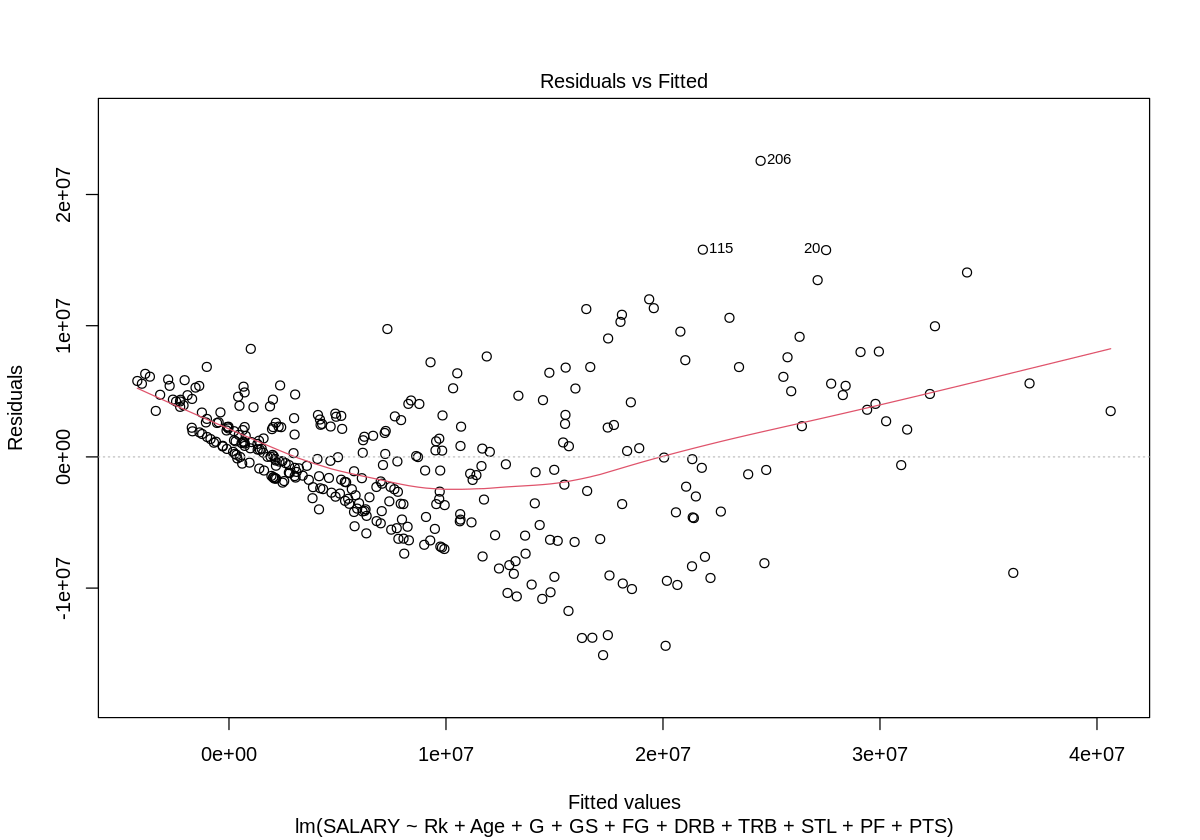

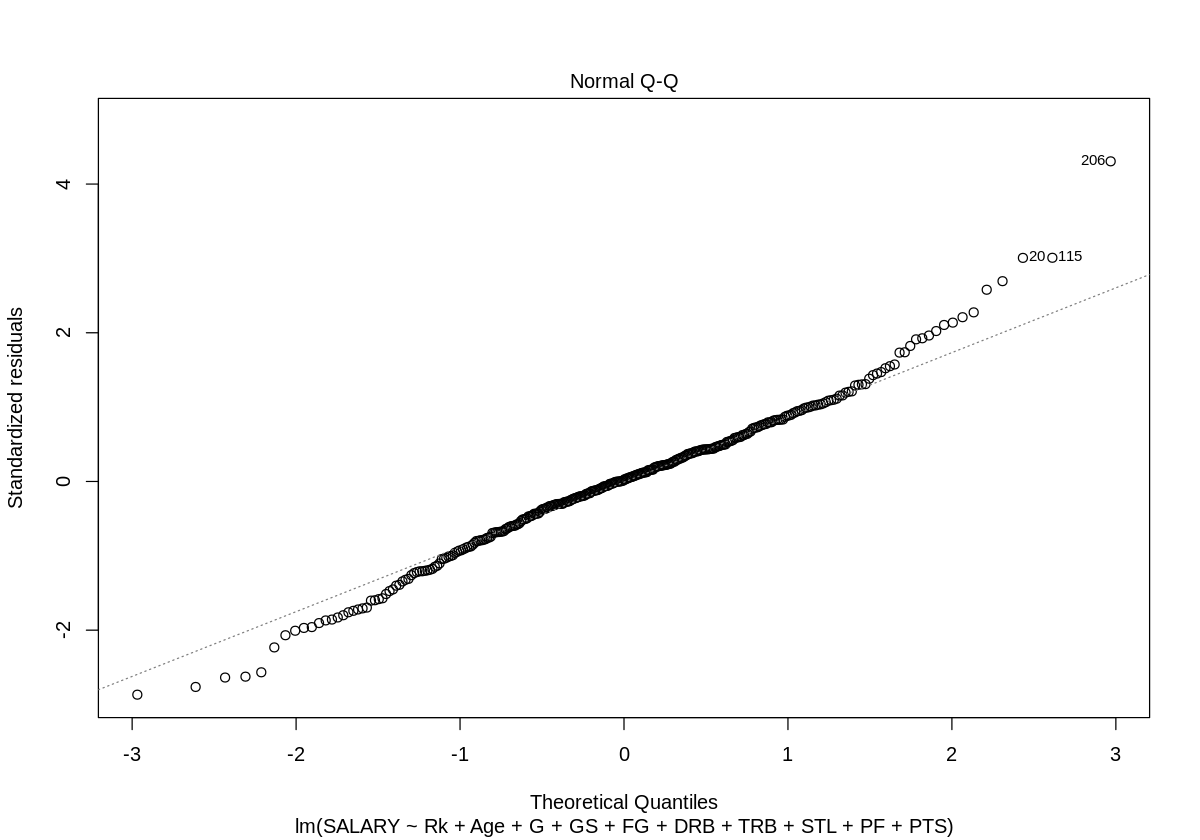

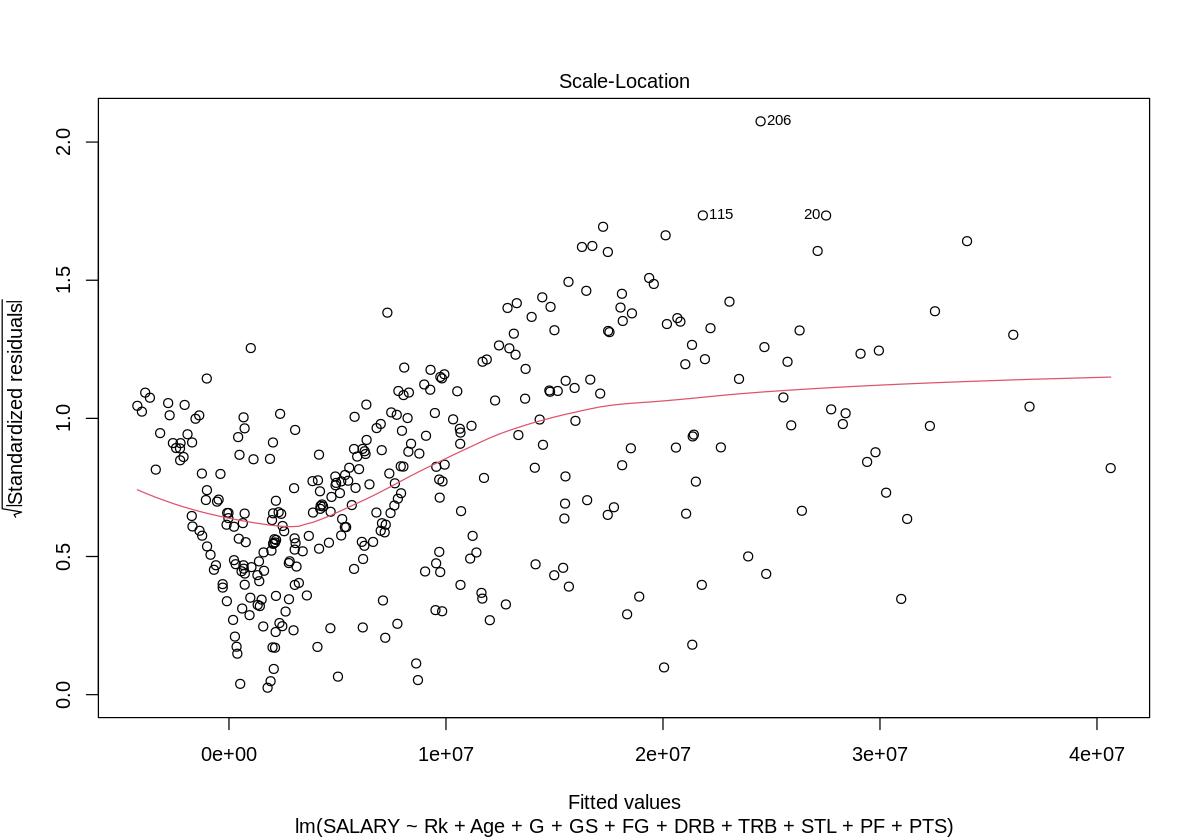

Rk       Age         G        GS        FG       DRB       TRB       STL 
 1.022774  1.075116  1.800139  2.757070 59.178795 30.050281 26.796775  1.775761 
       PF       PTS 
 2.450066 60.791141

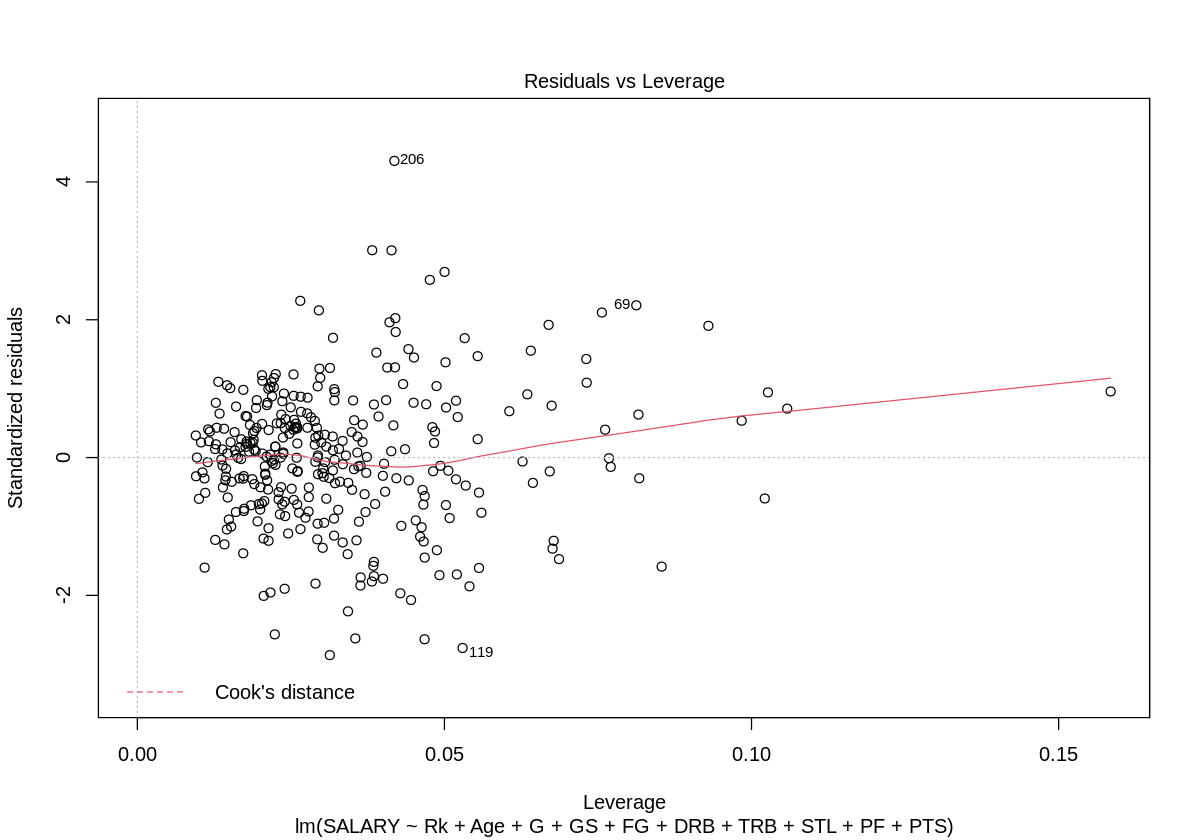

In [28]:
#check multicollinearity
plot(salary_fwd_generative)
vif(salary_fwd_generative)

- According to VIF function we see that there is supposedly multicollinearity in the model that we have chosen. The variables **DRB,TRB, FG and PTS** variables have high VIF. Looking at these inputs they might seem correlated. With **DRB(Defensive Rebounds)** and **TRB(Total Rebounds per game)** seemingly to be correlated while **FG(Field Goal) and PTS(points per game)** also being correlated. Removing DRB and FG. We get the following model: 


Call:
lm(formula = SALARY ~ Rk + Age + G + GS + TRB + STL + PF + PTS, 
    data = training_salary)

Residuals:
      Min        1Q    Median        3Q       Max 
-15143141  -3169340    107192   3058097  22469586 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.519e+07  2.083e+06  -7.292 2.34e-12 ***
Rk           4.739e+02  1.780e+03   0.266 0.790278    
Age          5.825e+05  7.309e+04   7.970 2.71e-14 ***
G           -5.445e+04  1.629e+04  -3.343 0.000925 ***
GS           4.961e+04  1.858e+04   2.669 0.007981 ** 
TRB          4.967e+05  1.857e+05   2.675 0.007858 ** 
STL         -7.042e+05  9.737e+05  -0.723 0.470051    
PF          -1.915e+06  5.986e+05  -3.199 0.001516 ** 
PTS          1.267e+06  7.251e+04  17.473  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5338000 on 325 degrees of freedom
Multiple R-squared:  0.7442,	Adjusted R-squared:  0.7379 
F-statistic: 118.2 on 8 and 325 DF, 

Rk      Age        G       GS      TRB      STL       PF      PTS 
1.018040 1.050703 1.769115 2.728709 2.133001 1.750866 2.365979 2.538029

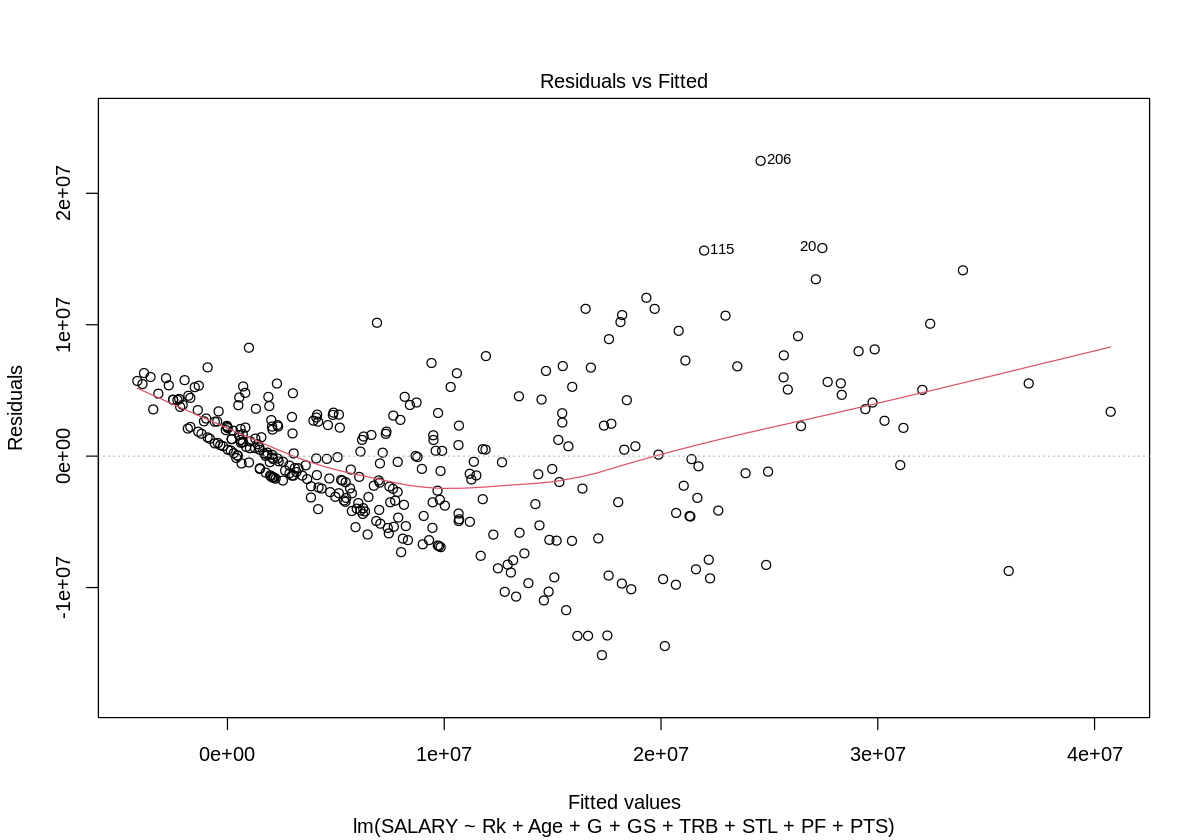

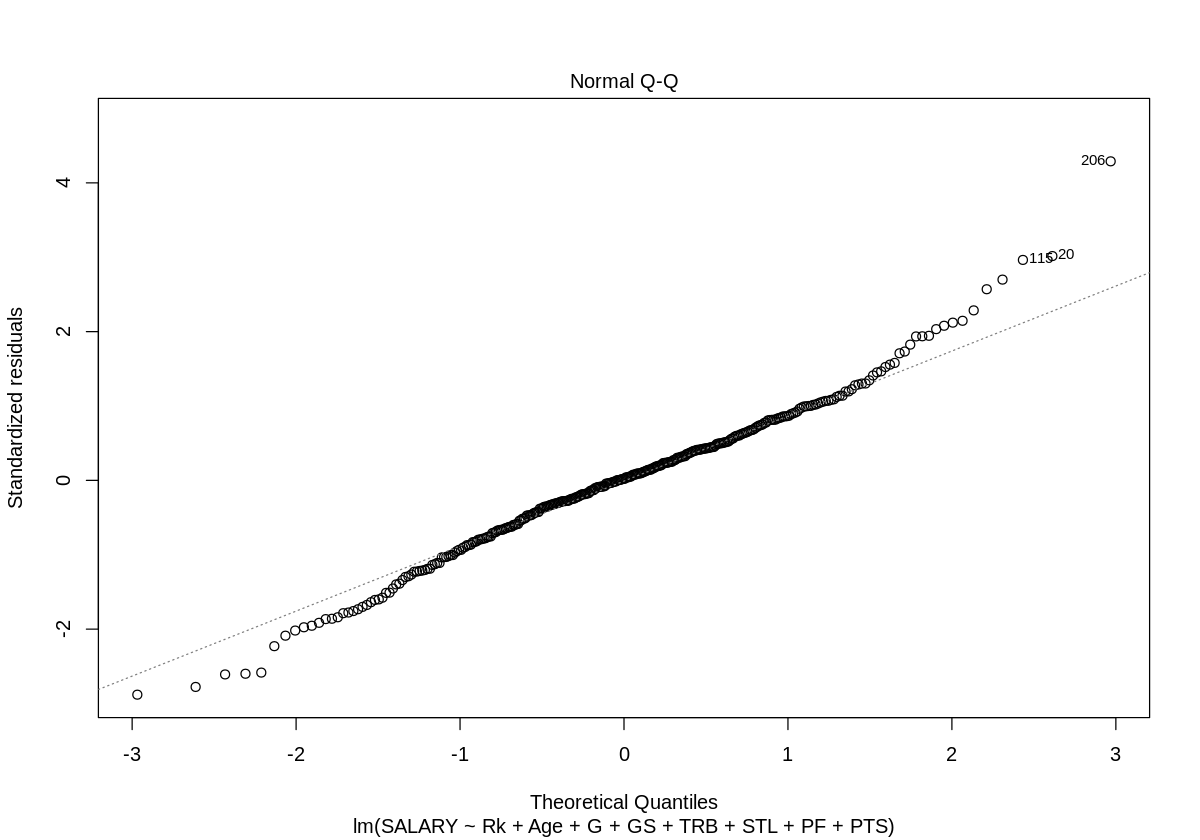

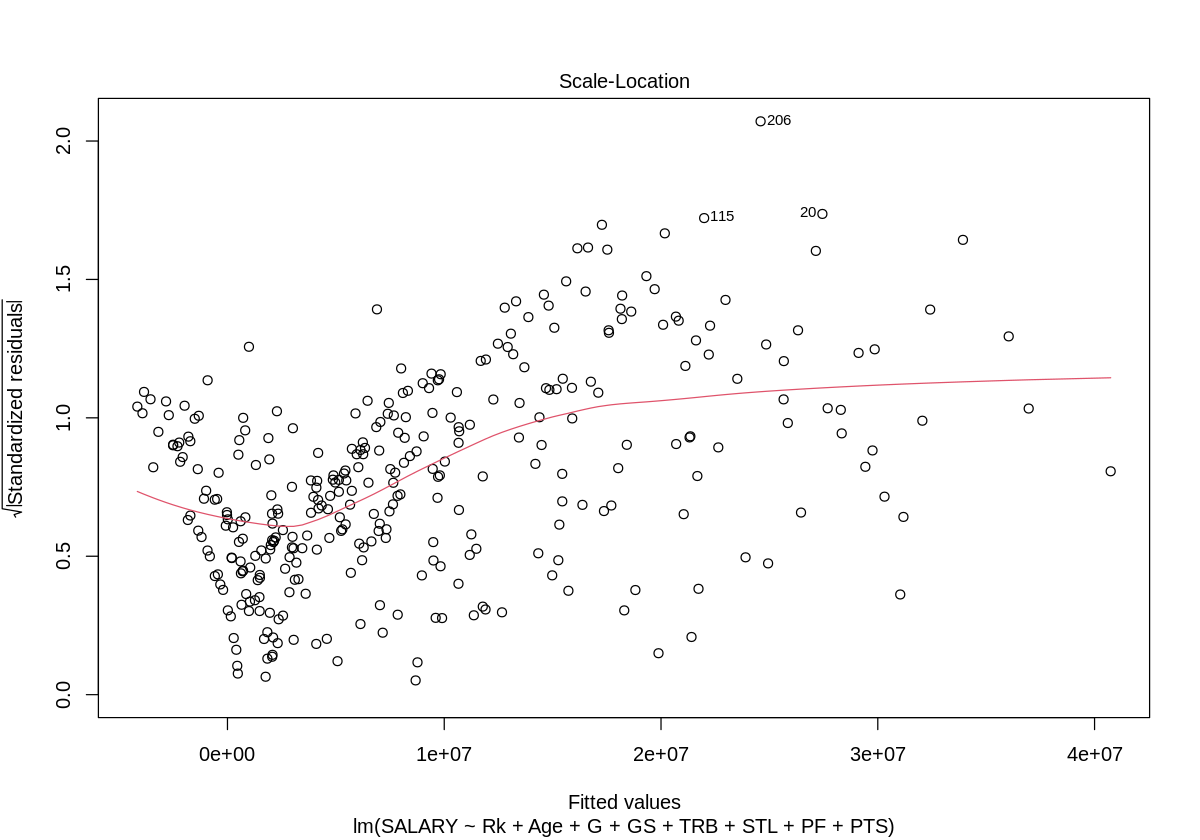

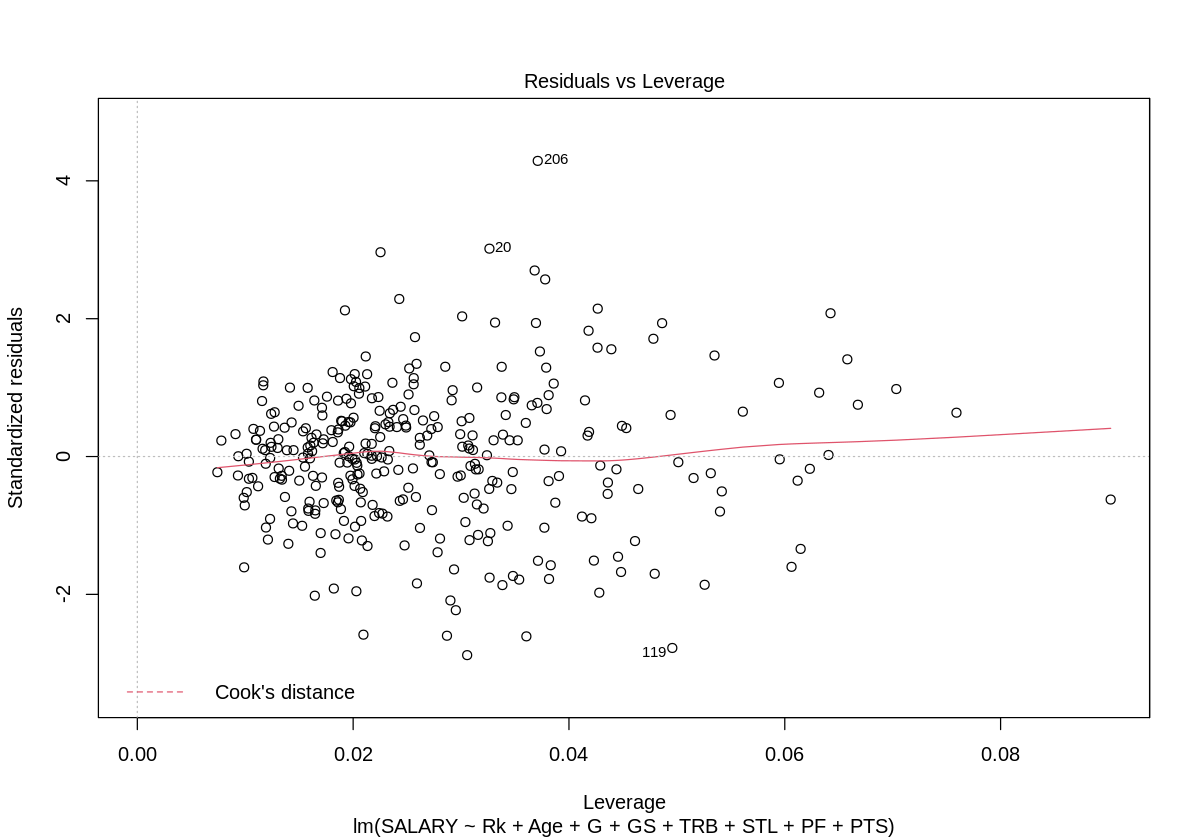

In [29]:
#new model with no multicollinearity
lm_no_multicollinearity <- lm(SALARY ~ Rk+Age+G+GS+TRB+STL+PF+PTS,  training_salary)
summary(lm_no_multicollinearity)
vif(lm_no_multicollinearity)
plot(lm_no_multicollinearity)

### How good does this new model with no multicollinearity fit the data compared to the forward reduced model we had chosen? Does it fit the data better?

In [30]:
mod1<-anova(lm_no_multicollinearity,salary_fwd_generative)
mod2<-anova(lm_no_multicollinearity,salary_bwd_generative)
mod3<-anova(lm_no_multicollinearity,salary_full_OLS_add)
mod1$`Pr(>F)`
mod2$`Pr(>F)`
mod3$`Pr(>F)`

[1]        NA 0.9507359

[1]         NA 0.03965399

[1]           NA 0.0003057252

- From the results above, at 5% significance level, removing multicollinearity doesn't fit the data better than the forward reduced model's fit because the pvalue is greater than the significance level. Thus, we can use the forward reduced model for regression.

In [31]:
anova(salary_fwd_generative,salary_full_OLS_add)

Res.Df RSS          Df Sum of Sq    F        Pr(>F)      
1 323    9.258248e+15 NA           NA       NA           NA
2 306    7.963050e+15 17 1.295199e+15 2.927719 0.0001126804

- It can be seen that at 5% significance level, the forward reduced model fits the data better than the full OLS additive model.

In [32]:
red_results <- tidy(salary_fwd_generative) %>% mutate_if(is.numeric, round, 4)
red_results

term        estimate      std.error   statistic p.value
1  (Intercept) -1.528639e+07 2117152.014 -7.2203   0.0000 
2  Rk           4.363514e+02    1789.731  0.2438   0.8075 
3  Age          5.849862e+05   74148.022  7.8894   0.0000 
4  G           -5.376347e+04   16478.029 -3.2627   0.0012 
5  GS           4.931356e+04   18734.684  2.6322   0.0089 
6  FG          -8.132802e+04  973688.831 -0.0835   0.9335 
7  DRB         -2.856986e+05  901339.882 -0.3170   0.7515 
8  TRB          6.953471e+05  660198.824  1.0532   0.2930 
9  STL         -6.672853e+05  983472.118 -0.6785   0.4979 
10 PF          -1.950413e+06  610903.092 -3.1927   0.0015 
11 PTS          1.309909e+06  355926.128  3.6803   0.0003

- At 5% significance level, the following variables **Age,G,GS,PF and PTS** are all significant as they have pvalues less than 0.05

## Discussion


- Summarize what you found, and the implications/impact of your findings.

At 95 confidence level, we have enough evidence to conculde that in NBA league, the age of the player, the number of games played and started in the seasons, personal fouls per game and points per game are statistically correlated to the salary of the player in the season.
Our finding can be used to predict the the salary of the player in text season and giving scouts clues to discover valuable basketball players and make choices in the player trading market base on the performance of players.


- If relevant, discuss whether your results were what you expected to find.

We expected that the age of the player, the number of games played and started in the seasons, points, playing time, total rebounds, asists per game are correlated to the salary of the player. However, only first three factors and personal foul per game(out of expectation) are correlated to the salary of the player.


- Discuss how your model could be improved

Firstly, we should add in a categorical column to indicate if the player is injured in this season. Because injury can significantly impact the performance and game attendance of the player. For example, in 21-22 season, Kyrie Irving, who is one of the core player of BRK, missed 53 games due to injury, but he still have a high salary. This factor can decrease the acurracy of our model and increase the error term.

Secondly, the position of the player is highly related to the performance of the player. For example, grouds tend to have fewer blocks than centers. And centers tend to have fewer asists and three-point shots than centers. And there are different criteria for players at different positions. This factor can increase the error term of our model. We should generate different models for some positions.


- Discuss future questions/research this study could lead to
1. Multiple linear regression model in our study have really big standard error. Is there any other model in machine learning such as ensembles  or deep learning can modeling the case with smaller standard error?
2. Is our model still working on other basketball leagues such as FIBA, CBA, NBL?


## References

Wikipedia contributors. (2021, January 7). Player tracking (National Basketball Association). Wikipedia. https://en.wikipedia.org/wiki/Player_tracking_(National_Basketball_Association)

Academy, S. U. S. (2018, July 13). Determinants of NBA Player Salaries. The Sport Journal. https://thesportjournal.org/article/determinants-of-nba-player-salaries/

Academy, S. U. S. (2018a, June 19). NBA Players’ Pay and Performance: What Counts? The Sport Journal. https://thesportjournal.org/article/nba-players-pay-and-performance-what-counts/